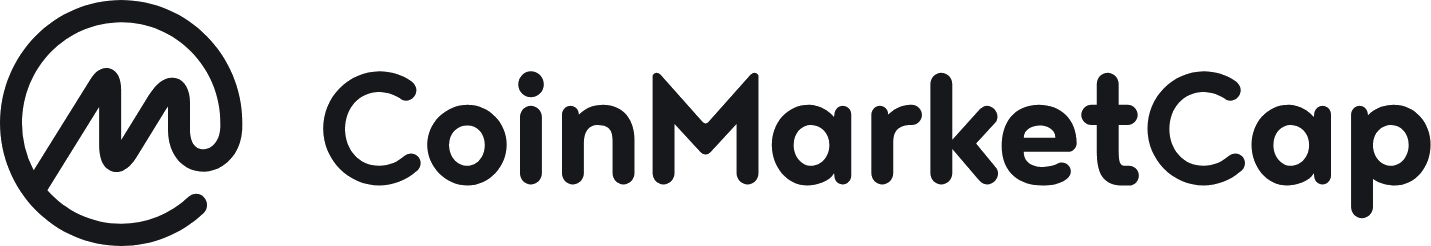

In [19]:
from IPython import display
display.Image("../Data_cleaning_proj/IMG/img.png")

With its high accuracy and trustworthiness, CoinMarketCap is the most trusted and accurate source of crypto market information and pricing in the world. It is a U.S.-based company. With its launch in 2013, CoinMarketCap has been the go-to place for tracking cryptocurrency prices. In the rapidly changing cryptocurrency space, every trading market uses CoinMarketCap to compare crypto entities on a minute-by-minute basis. As an independent, timely, and accurate source of information, CoinMarketCap allows users to draw their own conclusions.

Data Scraped from :
https://coinmarketcap.com/currencies/bitcoin/historical-data/

Note:The dataset consists of daily Bitcoin pricing information for the period of 04-29-2013 to 07-06-2021:

ApI documentaion: https://coinmarketcap.com/api/documentation

# Data Collection From API

Data collected was in form of Json, I have saved the data in Pandas Dataframe for data manupulation

In [2]:
import time
import requests
import warnings
warnings.filterwarnings("ignore")

def get_timestamp(datetime: str):
    return int(time.mktime(time.strptime(datetime, '%Y-%m-%d %H:%M:%S')))


def get_btc_quotes(start_date: str, end_date: str):
    start = get_timestamp(start_date)
    end = get_timestamp(end_date)
    url = f'https://web-api.coinmarketcap.com/v1/cryptocurrency/ohlcv/historical?id=1&convert=USD&time_start={start}&time_end={end}'
    return requests.get(url).json()


data = get_btc_quotes(start_date='2013-04-29 00:00:00',
                      end_date='2021-07-06 00:00:00')

import pandas as pd

data_flat = [quote['quote']['USD'] for quote in data['data']['quotes']]
df = pd.DataFrame(data_flat)

# Visualizing The data

In [3]:
df.dtypes

open          float64
high          float64
low           float64
close         float64
volume        float64
market_cap    float64
timestamp      object
dtype: object

In [4]:
df.shape,df.head()

((2990, 7),
          open        high         low       close  volume    market_cap  \
 0  144.000000  146.929993  134.050003  139.000000     0.0  1.542813e+09   
 1  139.000000  139.889999  107.720001  116.989998     0.0  1.298955e+09   
 2  116.379997  125.599998   92.281898  105.209999     0.0  1.168517e+09   
 3  106.250000  108.127998   79.099998   97.750000     0.0  1.085995e+09   
 4   98.099998  115.000000   92.500000  112.500000     0.0  1.250317e+09   
 
                   timestamp  
 0  2013-04-30T23:59:59.999Z  
 1  2013-05-01T23:59:59.999Z  
 2  2013-05-02T23:59:59.999Z  
 3  2013-05-03T23:59:59.999Z  
 4  2013-05-04T23:59:59.999Z  )

# Data Processing:

* Rename the Timestamp column
* Change the date notation(string date) to numerical date
* Add two additinal column to uniquely identify bitcoin records
* drop defalut index and make Date column index


In [5]:
#Rename the Timestamp column
df.rename({"timestamp": "Date"},axis='columns', inplace=True)        

In [6]:
# Json data bydefault covert the date field to str, here I am converting it to date
import datetime
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].apply(lambda x: x.date())


In [7]:
#Add two additinal column to uniquely identify bitcoin records
df['Name']='Bitcoin'
df['Symbol']='BTC'
#note: In future I might collect data for other coins for more analysis

In [8]:
#drop defalut index and make Date column index
df.set_index('Date', drop=True, inplace=True)
df.sort_index(inplace=True)

In [9]:
df = df.dropna(axis = 0)
df.head()

,open,high,low,close,volume,market_cap,Name,Symbol
Date,,,,,,,,
2013-04-30,144.000000,146.929993,134.050003,139.000000,0.0,1.542813e+09,Bitcoin,BTC
2013-05-01,139.000000,139.889999,107.720001,116.989998,0.0,1.298955e+09,Bitcoin,BTC
2013-05-02,116.379997,125.599998,92.281898,105.209999,0.0,1.168517e+09,Bitcoin,BTC
2013-05-03,106.250000,108.127998,79.099998,97.750000,0.0,1.085995e+09,Bitcoin,BTC
2013-05-04,98.099998,115.000000,92.500000,112.500000,0.0,1.250317e+09,Bitcoin,BTC


In [10]:
# check the missing values
df.isnull().any()

open          False
high          False
low           False
close         False
volume        False
market_cap    False
Name          False
Symbol        False
dtype: bool

In [11]:
#view the columns
df.shape,df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2990 entries, 2013-04-30 to 2021-07-06
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   open        2990 non-null   float64
 1   high        2990 non-null   float64
 2   low         2990 non-null   float64
 3   close       2990 non-null   float64
 4   volume      2990 non-null   float64
 5   market_cap  2990 non-null   float64
 6   Name        2990 non-null   object 
 7   Symbol      2990 non-null   object 
dtypes: float64(6), object(2)
memory usage: 210.2+ KB


((2990, 8), None)

## Lag Plot ( check whether time series is random or not)
resource: http://www.itl.nist.gov/div898/handbook/eda/section3/lagplot.htm

In the graph below, first axis represents the t(lag), second axis represents t+1

Ex: if data is, [1,4,5,3,2], then y(t):= [1,4,5,3,2], y(t+1): = [4,5,3,2]

As we see the graph below, this suggests the non-random pattern (graph is poistively linear).

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

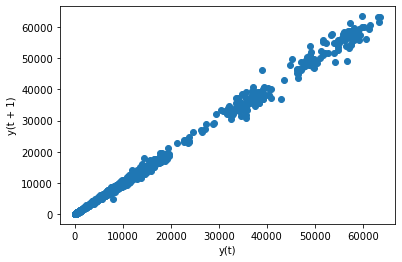

In [12]:
import warnings
warnings.filterwarnings("ignore")
from pandas.plotting import lag_plot
lag_plot(df.close)

# Save the Dataframe in CSV file ,so we dont have to connect to the API all the time during data analysis

In [18]:
csv_data = df.to_csv('../Data_cleaning_proj/DATA/coin_Bitcoin_Final.csv')